In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import nonlinear_QM_FPJPA as Fs
import wx_programs as wx
import bnc
from generator import *
from hardware_config import *
from values import *
from qubit_class import *
import standard_sequences.pinopi as pnp
import daq_programs_homo as daq
import standard_sequences.spectroscopy as spec
import standard_sequences.rabi as rabi
import analysis

In [3]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
ROIF1 = q1_dict["ro_freq"] - readout_dict["RO_LO"]
ROIF2 = q2_dict["ro_freq"] - readout_dict["RO_LO"]
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
q1 = Qubit(q1_dict)
q2 = Qubit(q2_dict)
readout = Readout(readout_dict)
type(readout.ro_dur)
IQ_angle_q1 = 240
IQ_angle_q2 = 220
num_steps = 101
reps = 1000
qubit_1_thr = [-5000, 5000]
qubit_2_thr = [-5000, 5000]
sweep_time = 200

In [3]:
rabi.rabi_ge(
    q1, q2, readout, gen_vals=general_vals_dict, num_steps=51, sweep_time=sweep_time
)

writing to C:\Users\quantum1\Documents\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\pulse_sequences\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\Users\quantum1\Documents\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\pulse_sequences\
num_steps 51
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error


In [5]:
# pnp.pipi_pi_nopi(0, 0, q1, readout, general_vals_dict, save_dir)
# pnp.pipi_pi_nopi(1, 1, q1, readout, general_vals_dict, save_dir)
# spec.spectroscopy_ef(q1,readout, general_vals_dict,save_dir,ssm_start=-0.15,ssm_stop = -0.25,spec_amp = 0.5, ROIF1 = ROIF1, ROIF2  =ROIF2)

0, No error
0, No error
0, No error
Patterns: 101
Records per pattern: 1000
Buffers per acquistion: 33
DAQ samples per pattern: 8192
0, No error
Capturing 33 buffers. Press <enter> to abort
Capture completed in 11.991375 sec
Captured 33 buffers (2.751978 buffers per sec)
Captured 101376 records (8454.076053 records per sec)
Transferred 1660944384 bytes (138511582.047894 bytes per sec)


<Figure size 800x800 with 0 Axes>

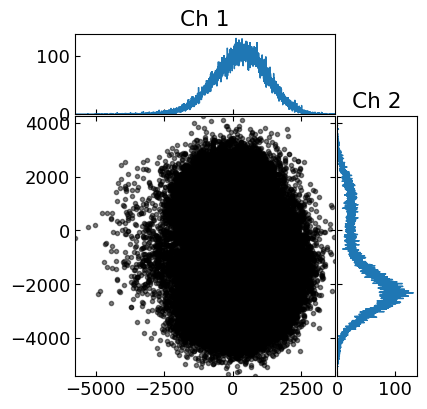

<Figure size 800x800 with 0 Axes>

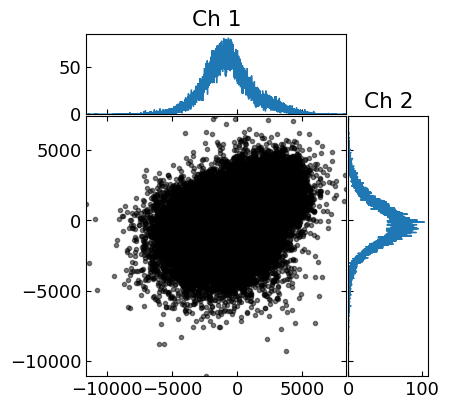

In [4]:
wx.wx_set_and_amplitude_and_offset(
    amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
)
(
    n_vs_pats_1,
    n_vs_pats_2,
    rec_avg_all,
    rec_all,
    rec_readout_1,
    rec_readout_2,
    rec_avg_vs_pats_1,
    rec_avg_vs_pats_2,
    rec_all_het_1,
    rec_all_het_2,
    bins_1,
    bins_2,
    counts_1,
    counts_2,
    prob_vs_pats_1,
    prob_vs_pats_2,
    n_readout_1,
    n_readout_2,
    rec_readout_vs_pats_1,
    rec_readout_vs_pats_2,
) = daq.run_daq_het_2q(
    ROIF1,
    ROIF2,
    deg_1=IQ_angle_q1,
    deg_2=IQ_angle_q2,
    num_patterns=num_steps,
    num_records_per_pattern=reps,
    ro_dur=readout.ro_dur,
    qubit_1_thr=qubit_1_thr,
    qubit_2_thr=qubit_2_thr,
    verbose=True,
)

Qubit 1


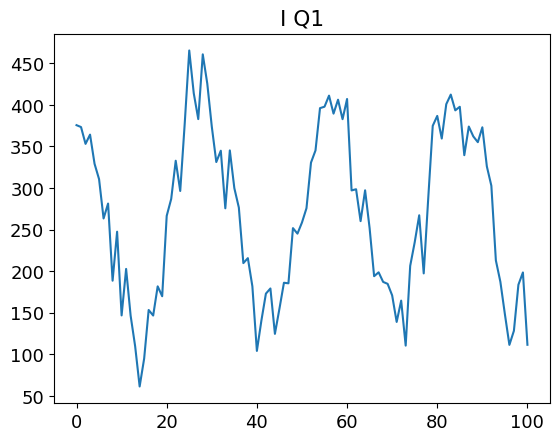

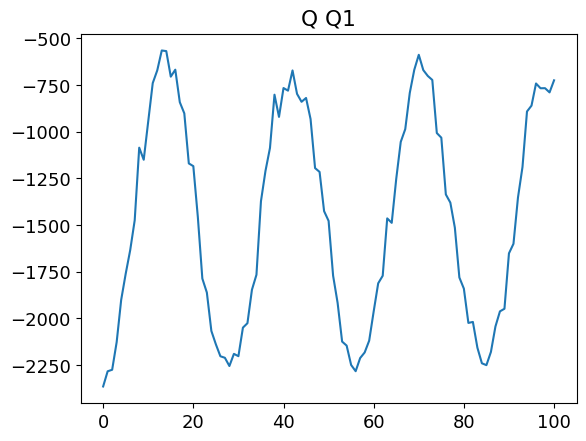

In [5]:
print("Qubit 1")
P_Q1 = prob_vs_pats_1[0]
I_Q1 = rec_avg_vs_pats_1[0]
Q_Q1 = rec_avg_vs_pats_1[1]

plt.plot(I_Q1)
plt.title("I Q1")
plt.show()
plt.plot(Q_Q1)
plt.title("Q Q1")
plt.show()

Qubit 2


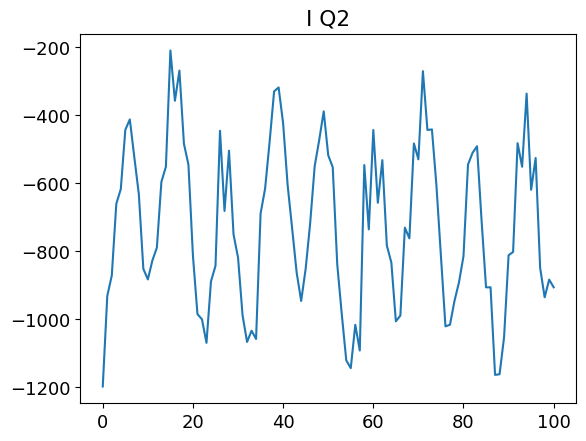

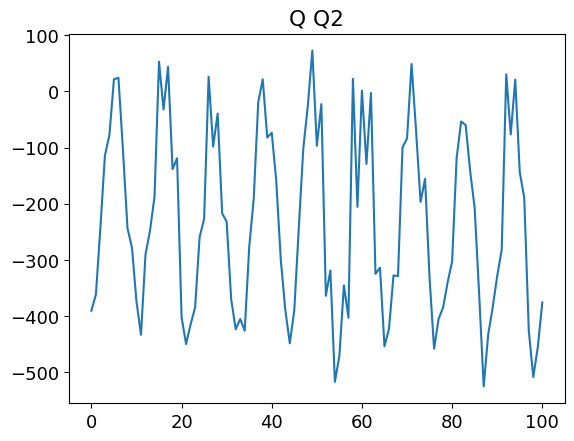

In [6]:
print("Qubit 2")
P_Q2 = prob_vs_pats_2[0]
# plt.plot(P_Q1);plt.title('Q1 thresholded');plt.show()
I_Q2 = rec_avg_vs_pats_2[0]
Q_Q2 = rec_avg_vs_pats_2[1]

plt.plot(I_Q2)
plt.title("I Q2")
plt.show()
plt.plot(Q_Q2)
plt.title("Q Q2")
plt.show()

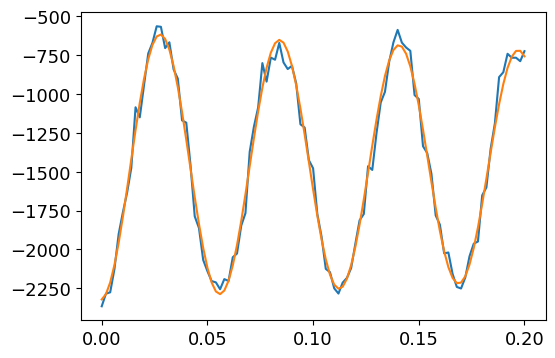



  freq: 17.70636236533956 +/- 0.03409712110651267
 gamma: 0.7555660109284179 +/- 0.20091790724418263
   amp: 861.9048181440622 +/- 19.576202577920444
 phase: -86.42885404282964 +/- 1.34880598692133
offset: -1461.0213980649157 +/- 6.866700779398693
pi_pulse time: 0.028238437104323392 +/- 0.03409712110651267
π_ge time = 28.238437104323392 ns


In [7]:
Qrange = abs(np.max(Q_Q1) - np.min(Q_Q1))
Irange = abs(np.max(I_Q1) - np.min(I_Q1))
if Qrange > Irange:
    times = np.linspace(0, sweep_time / 1000, num_steps)
    pi_ge_fit_vals, _, _, _ = analysis.fit_sine_decay(
        times,
        Q_Q1,
        guess_vals=[11, 0.3, np.abs(np.max(Q_Q1) - np.min(Q_Q1)), 38, Q_Q1[0]],
    )
    pi_ge = abs((1 / 2 / pi_ge_fit_vals[0]) * 1000)
    print("\u03C0_ge time = {} ns".format(pi_ge))
else:
    times = np.linspace(0, sweep_time / 1000, num_steps)
    pi_ge_fit_vals, _, _, _ = analysis.fit_sine_decay(
        times,
        I_Q1,
        guess_vals=[11, 0.3, np.abs(np.max(I_Q1) - np.min(I_Q1)), 38, I_Q1[0]],
    )
    pi_ge = abs((1 / 2 / pi_ge_fit_vals[0]) * 1000)
    print("\u03C0_ge time = {} ns".format(pi_ge))

In [10]:
 freq: 17.620308773534404 +/- 0.02436606989835497
 gamma: 0.7305543606339199 +/- 0.14495849340001574
   amp: -325.3268484118704 +/- 5.330073185534173
 phase: 94.858123929204 +/- 0.9668173294635235
offset: 527.9461021145441 +/- 1.866019161019875
pi_pulse time: 0.028376347226729475 +/- 0.02436606989835497
π_ge time = 28.376347226729475 ns
Ground State = 853.2729505264145 
Excited State = 202.61925370267375 

SyntaxError: invalid syntax (2895767714.py, line 1)